  ### Дипломная работа по курсу «Python для анализа данных»


##### 1.Загрузить файл hr.csv
##### 2.Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
##### 3.Рассчитать и визуализировать корреляционную матрицу для переменных
##### 4.Визуализировать несколько взаимосвязей между переменными 
##### 5.C использованием t-test статистики проверить взаимосвязи между несколькими выборками (двумя или больше)
##### 6.Рассчитать сколько работников работает в каждом департаменте
##### 7.Показать распределение сотрудников по зарплатам
##### 8.Показать распределение сотрудников по зарплатам совместно с департаментами
##### 9.Сколько сотрудников покинули компанию
##### 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from scipy.stats import pearsonr
from scipy import stats

#### 1. Загрузить файл hr.csv

In [6]:
hr_df = pd.read_csv('hr.csv')
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [7]:
hr_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
print('Медиана:\n', hr_df.median())
print('Мода satisfaction_level ',statistics.mode(hr_df.satisfaction_level))
print('Мода last_evaluation ',statistics.mode(hr_df.last_evaluation))
print('Мода time_spend_company ',statistics.mode(hr_df.time_spend_company))
print('Мода Work_accident ',statistics.mode(hr_df.Work_accident))
print('Мода left ',statistics.mode(hr_df.left))
print('Мода promotion_last_5years ',statistics.mode(hr_df.promotion_last_5years))

Медиана:
 satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64
Мода satisfaction_level  0.1
Мода last_evaluation  0.55
Мода time_spend_company  3
Мода Work_accident  0
Мода left  0
Мода promotion_last_5years  0


#### 3. Рассчитать и визуализировать корреляционную матрицу для переменных

In [9]:
corr = hr_df.corr()
corr = corr.round(2)
corr.style.background_gradient(cmap='coolwarm')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.110000,-0.140000,-0.020000,-0.100000,0.060000,-0.390000,0.030000
last_evaluation,0.110000,1.000000,0.350000,0.340000,0.130000,-0.010000,0.010000,-0.010000
number_project,-0.140000,0.350000,1.000000,0.420000,0.200000,-0.000000,0.020000,-0.010000
average_montly_hours,-0.020000,0.340000,0.420000,1.000000,0.130000,-0.010000,0.070000,-0.000000
time_spend_company,-0.100000,0.130000,0.200000,0.130000,1.000000,0.000000,0.140000,0.070000
Work_accident,0.060000,-0.010000,-0.000000,-0.010000,0.000000,1.000000,-0.150000,0.040000
left,-0.390000,0.010000,0.020000,0.070000,0.140000,-0.150000,1.000000,-0.060000
promotion_last_5years,0.030000,-0.010000,-0.010000,-0.000000,0.070000,0.040000,-0.060000,1.000000


In [10]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
is_string_dtype(hr_df['sales'])
is_numeric_dtype(hr_df['sales'])

False

In [11]:
# 2 параметра salary и sales - категориальные, и следовательно они не попадают в расчет корреляционной матрицы.
# Сделаем mapping и учтем их в матрице корреляций

# df.groupby('sales').mean()
if is_string_dtype(hr_df['sales']):
    d = {'IT' : 0, 
         'RandD' : 1, 
         'accounting' : 2,
         'hr' : 3, 
         'management' : 4,
         'marketing' : 5,
         'product_mng' : 6,
         'sales' : 7,
         'support' : 8,
         'technical' : 9}

    hr_df['sales'] = hr_df['sales'].map(d)
  
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,low
1,0.80,0.86,5,262,6,0,1,0,7,medium
2,0.11,0.88,7,272,4,0,1,0,7,medium
3,0.72,0.87,5,223,5,0,1,0,7,low
4,0.37,0.52,2,159,3,0,1,0,7,low


In [12]:
if is_string_dtype(hr_df['salary']):
    sal = {
        'high': 0,
        'low':1,
        'medium':2
    }
    hr_df['salary'] = hr_df['salary'].map(sal)
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [13]:
# Повторно смотрим на матрицу корреляций
corr = hr_df.corr()
corr = corr.round(2)
corr.style.background_gradient(cmap='coolwarm')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
satisfaction_level,1.000000,0.110000,-0.140000,-0.020000,-0.100000,0.060000,-0.390000,0.030000,0.000000,0.010000
last_evaluation,0.110000,1.000000,0.350000,0.340000,0.130000,-0.010000,0.010000,-0.010000,0.010000,0.010000
number_project,-0.140000,0.350000,1.000000,0.420000,0.200000,-0.000000,0.020000,-0.010000,0.010000,0.010000
average_montly_hours,-0.020000,0.340000,0.420000,1.000000,0.130000,-0.010000,0.070000,-0.000000,0.000000,0.010000
time_spend_company,-0.100000,0.130000,0.200000,0.130000,1.000000,0.000000,0.140000,0.070000,-0.020000,-0.000000
Work_accident,0.060000,-0.010000,-0.000000,-0.010000,0.000000,1.000000,-0.150000,0.040000,0.000000,-0.000000
left,-0.390000,0.010000,0.020000,0.070000,0.140000,-0.150000,1.000000,-0.060000,0.030000,-0.000000
promotion_last_5years,0.030000,-0.010000,-0.010000,-0.000000,0.070000,0.040000,-0.060000,1.000000,-0.030000,-0.000000
sales,0.000000,0.010000,0.010000,0.000000,-0.020000,0.000000,0.030000,-0.030000,1.000000,0.000000
salary,0.010000,0.010000,0.010000,0.010000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,1.000000


##### Выводы по заданию №3: Мы рассмотриваем целевой показатель - покинули компанию или нет (left). Далее рассмотрим от каких параметров он зависит. В нашем случае это: satisfaction_level (-0,39) time_spend_company (0,14) Work_accident(-0,15). Если в дальнейшем будет понимание, что вероятность ухода высока, то акцентируя внимание на эти показатели в будующем, скорее всего сможем как-то скорректировать ситуацию.

#### 4.Визуализировать несколько взаимосвязей между переменными

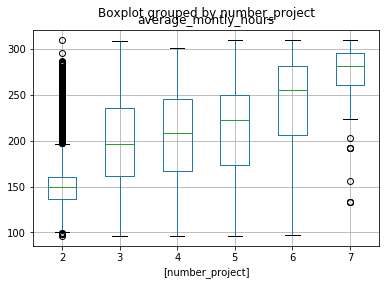

In [21]:
# В Dataset корреляционные связи имеют категориальные переменные. Их лучше через boxplot визуализировать


boxplot = hr_df[[ 'number_project',  'average_montly_hours']].boxplot(by='number_project')


##### Вывод : Медиана расхода часов примерно одинакова для сотрудников, которые ведут 3 проекта и 5 проектов. Если ввести нормативы по количеству проектов, то будет прирост производительности без прироста зароботной платы (по часовой ставке)

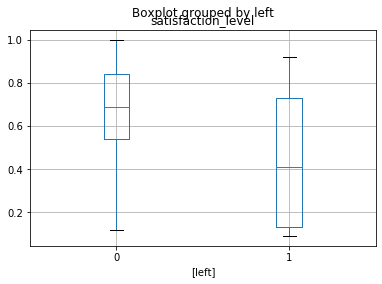

In [18]:
boxplot = hr_df[['satisfaction_level', 'left' ]].boxplot(by='left')

##### Вывод: Медиана удовлетворенности сотрудников, покинувших компанию меньше, чем тех кто еще остался.

####  5. С использованием t-test статистики проверить взаимосвязи между несколькими выборками (двумя или больше)

In [24]:
#  среднее значение price машин с размером двигателя больше 150 = price всей выборки
# среднее значение satisfaction_level людей покинувших компанию = satisfaction_level всех сотрудников
satisfaction_level_left = hr_df[hr_df['left'] == 1]['satisfaction_level']
stats.ttest_1samp(satisfaction_level_left, hr_df['satisfaction_level'].mean())
# p-value равно 9e-279, что меньше стандартной альфа ошибки 0.05, поэтому отбрасываем нулевую гипотезу и можем сказать, что есть статистическое различие между satisfaction_level уволившихся и совокупностью всех людей.

Ttest_1sampResult(statistic=-39.10948894348446, pvalue=9.012781195378076e-279)

In [25]:
# 'number_project', 'average_montly_hours'
#  Среднее значение часов в месяц у людей, участвующих в 2 проектах, равно среднему числу часов в месяц у всех людей
average_montly_hours_2 = hr_df[hr_df['number_project'] == 2]['average_montly_hours']
stats.ttest_1samp(satisfaction_level_left, hr_df['average_montly_hours'].mean())
# p-value равно 0, что меньше стандартной альфа ошибки 0.05, поэтому мы отбрасываем нулевую гипотезу и можем сказать, что имеется различие между average_montly_hours у людей, участвующих в 2 проектах, и совокупностью всех людей.

Ttest_1sampResult(statistic=-45420.67748547626, pvalue=0.0)

In [27]:
# Заново перезагружаем Dataset
hr_df1 = pd.read_csv('hr.csv')
hr_df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### 6. Рассчитать сколько работников работает в каждом департаменте.

In [28]:
hr_df_alife = hr_df1[hr_df1['left']==0]
hr_df_alife.head()

hr_df_alife1 = hr_df_alife[['average_montly_hours','sales']].groupby('sales').count().reset_index()
hr_df_alife1 = hr_df_alife1.rename(columns = {"sales":"Department", "average_montly_hours":"Count_of_employees" }) 
hr_df_alife1

,Department,Count_of_employees
0,IT,954
1,RandD,666
2,accounting,563
3,hr,524
4,management,539
5,marketing,655
6,product_mng,704
7,sales,3126
8,support,1674
9,technical,2023


##### Вывод: По количеству сотрудников technical видим, что компания техническая. Так как число сотрудников sales больше чем support - это говорит о том, что компания на этапе развития.  Можно попробовать  оптимизировать "Усредненные нормативы службы персонала: 1 менеджер по персоналу – на 100 человек (персонала компании) 1 работник ОК – на 300-400 человек (персонала компании) 1 рекрутер – 10-15 вакансий"

#### 7. Показать распределение сотрудников по зарплатам. 

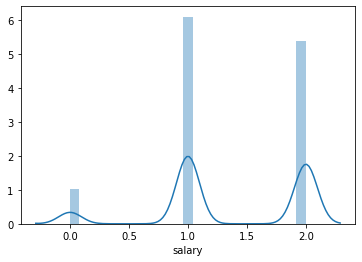

In [29]:
# 7.Показать распределение сотрудников по зарплатам.
sns.distplot(hr_df['salary'])
# 'high': 0,
# 'low':1,
# 'medium':2

##### Вывод: В основной массе сотрудники получают зарплату ниже среднего, немного меньше сотрудников получают среднюю заработную плату  и  совсем немного сотрудников получают высокую зарплату.

#### 8. Показать распределение сотрудников по зарплатам совместно с департаментами

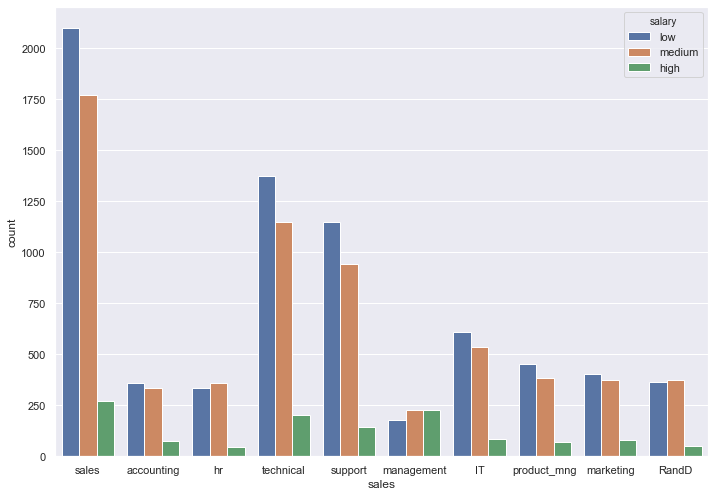

In [30]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x="sales", hue="salary", data=hr_df1 )

##### Вывод: Менеджмент получает хорошо (много сотрудников с высокой долей высоких з.пл sales, technical, support - низких зарплат больше всего, потом средние, потом высокие. Скорее всего это связано с высокой текучестью в этих подразделениях. Компания зарабатывает на "дешевых сотрудниках" accounting, hr, marketing, RandD - низкие и средние зарплаты примерно равны по количеству людей. Это говорит о снижении текучести, по сравнению с предыдущим буллетом. 

#### 9. Сколько сотрудников покинули компанию

In [35]:
print('Количество сотрудников покинувших компанию',hr_df['left'].loc[hr_df['left']==1].sum(),'человек')

Количество сотрудников покинувших компанию 3571 человек


##### Вывод: Компанию покинуло 3571 сотрудников)

#### 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

In [36]:
# Низкий satisfaction_level
import scipy

r, p_value = scipy.stats.pearsonr(hr_df['satisfaction_level'], hr_df['left'])
print('Коэффициент корреляции Пирсона равен: ', r ,', p_value: ' , p_value)

# Гипотеза 1: низкий уровень мотивации и удовлетворенности

Коэффициент корреляции Пирсона равен:  -0.38837498342411414 , p_value:  0.0


In [37]:
# time_spend_company
r, p_value = scipy.stats.pearsonr(hr_df['time_spend_company'], hr_df['left'])
print('Коэффициент корреляции Пирсона равен: ', r ,', p_value: ' , p_value)

# Гипотеза 2: Время проведенное внутри компании. После определенного стажа, нет смысла индексировать сотрудника.

Коэффициент корреляции Пирсона равен:  0.14482217493938604 , p_value:  4.207680457689936e-71


##### Общий вывод: Для снижения текучести  необходимо:  ПОВЫСИТЬ УРОВЕНЬ МОТИВАЦИИ СОТРУДНИКОВ.